In [ ]:
#Customer segmentation on the customer's records from a grocery database.
#Customer personality analysis helps a business to modify its product based on its target customers from different 
#types of customer segments. For example, instead of spending money to market a new product to every customer in the
#company’s database, a company can analyze which customer segment is most likely to buy the product and then market 
#the product only on that particular segment. Customer segmentation is the practice of separating customers into groups
#that reflect similarities among customers in each cluster. Helps to optimize the significance of each customer to 
#the business in order to modify products according to distinct needs and behaviours of the customers.

In [239]:
#Attributes

#People

#ID: Customer's unique identifier
#Year_Birth: Customer's birth year
#Education: Customer's education level
#Marital_Status: Customer's marital status
#Income: Customer's yearly household income
#Kidhome: Number of children in customer's household
#Teenhome: Number of teenagers in customer's household
#Dt_Customer: Date of customer's enrollment with the company
#Recency: Number of days since customer's last purchase
#Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#Products

#MntWines: Amount spent on wine in last 2 years
#MntFruits: Amount spent on fruits in last 2 years
#MntMeatProducts: Amount spent on meat in last 2 years
#MntFishProducts: Amount spent on fish in last 2 years
#MntSweetProducts: Amount spent on sweets in last 2 years
#MntGoldProds: Amount spent on gold in last 2 years
#Promotion

#NumDealsPurchases: Number of purchases made with a discount
#AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#Place

#NumWebPurchases: Number of purchases made through the company’s website
#NumCatalogPurchases: Number of purchases made using a catalogue
#NumStorePurchases: Number of purchases made directly in stores
#NumWebVisitsMonth: Number of visits to company’s website in the last month
#Target
#Need to perform clustering to summarize customer segments.

In [240]:
#import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
#from jqmcvi import base
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from scipy import stats
from sklearn.cluster import DBSCAN

In [241]:
#load dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [242]:
#check shape
df.shape

(2240, 29)

In [243]:
#get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [244]:
#view some basic statistical details
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [245]:
#lowercase column headers
df.columns=[item.lower() for item in df.columns]

In [246]:
#check duplicates
df.duplicated().sum()

0

In [247]:
#check null values
df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

<AxesSubplot:>

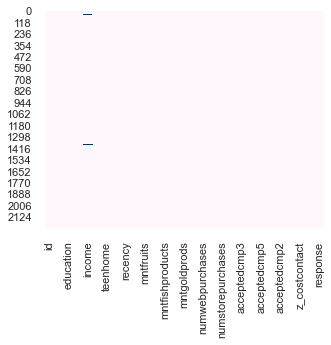

In [248]:
plt.figure(figsize=(5,4))
sns.set(font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [249]:
#percent of missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

income                 0.010714
response               0.000000
mntsweetproducts       0.000000
year_birth             0.000000
education              0.000000
marital_status         0.000000
kidhome                0.000000
teenhome               0.000000
dt_customer            0.000000
recency                0.000000
mntwines               0.000000
mntfruits              0.000000
mntmeatproducts        0.000000
mntfishproducts        0.000000
mntgoldprods           0.000000
z_revenue              0.000000
numdealspurchases      0.000000
numwebpurchases        0.000000
numcatalogpurchases    0.000000
numstorepurchases      0.000000
numwebvisitsmonth      0.000000
acceptedcmp3           0.000000
acceptedcmp4           0.000000
acceptedcmp5           0.000000
acceptedcmp1           0.000000
acceptedcmp2           0.000000
complain               0.000000
z_costcontact          0.000000
id                     0.000000
dtype: float64

In [250]:
#Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
df['dt_customer']=pd.to_datetime(df['dt_customer'])

In [251]:
#cap/floor outliers
#df = df[(df["income"]<600000)]
#df = df[(df["age"]<90)]

In [252]:
print("The newest customer's enrolment date in therecords:",max(df['dt_customer']))
print("The oldest customer's enrolment date in the records:",min(df['dt_customer']))

The newest customer's enrolment date in therecords: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


In [253]:
#feature engineering  -  designing artificial features
df['customer_for']=(date.today() - df['dt_customer'].dt.date).dt.days
df['age']=date.today().year - df['year_birth']

#Total spendings on various items
df["spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

#Feature for total members in the householde
df["children"]=df["kidhome"]+df["teenhome"]
df['living_with']=df['marital_status'].map({'Married' :'partner','Together':'partner','Single' :'alone','Divorced':'alone','Widow' :'alone','Alone':'alone','Absurd'  :'alone','YOLO' :'alone'})

#Total accepted campaigns
df['total_acc_cmp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] + df['response']

#Segmenting education levels in three groups
df["education"]=df["education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df['numtotalpurchases'] = df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases'] + df['numdealspurchases']

In [254]:
#cap/floor outliers
df = df[(df["income"]<600000)]
df = df[(df["age"]<90)]

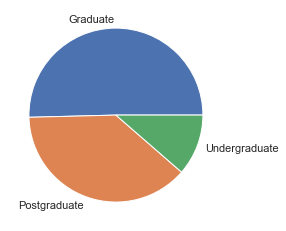

In [255]:
plt.figure(figsize=(5,4))
plt.pie(data=df['education'].value_counts(),x=df['education'].value_counts().values,labels=df['education'].value_counts().index);

In [256]:
df['marital_status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [257]:
#Dropping some of the redundant features
#to_drop = ['dt_customer',"z_costcontact", "z_revenue", "id","year_birth",'marital_status',
          # 'kidhome','teenhome','acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','response']
#df = df.drop(to_drop, axis=1)

In [258]:
#remove outliers function with the help of interquartile range
def remove_outliers(df,cols):
    for item in cols:
        sorted(item)
        q25,q75=np.percentile(df[item],[25,75])
        IQR=q75-q25
        lower=q25-1.5*IQR
        upper=q75+1.5*IQR
        df.drop((df[(df[item]<lower) | (df[item]>upper)]).index , axis=0,inplace=True)

In [259]:
#cap/floor outliers function with the help of IQR
def cap_floor_outliers(df,cols):
    for i,col in enumerate(cols):
        sorted(col)
        q25,q75=np.percentile(df[col],[25,75])
        iqr=q75-q25
        lower=q25-1.5*iqr
        upper=q75+1.5*iqr
        df.loc[df[col]<lower,col] = np.percentile(df[col], 10)
        df.loc[df[col]>upper,col] = np.percentile(df[col], 90)

In [260]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(exclude='number').columns

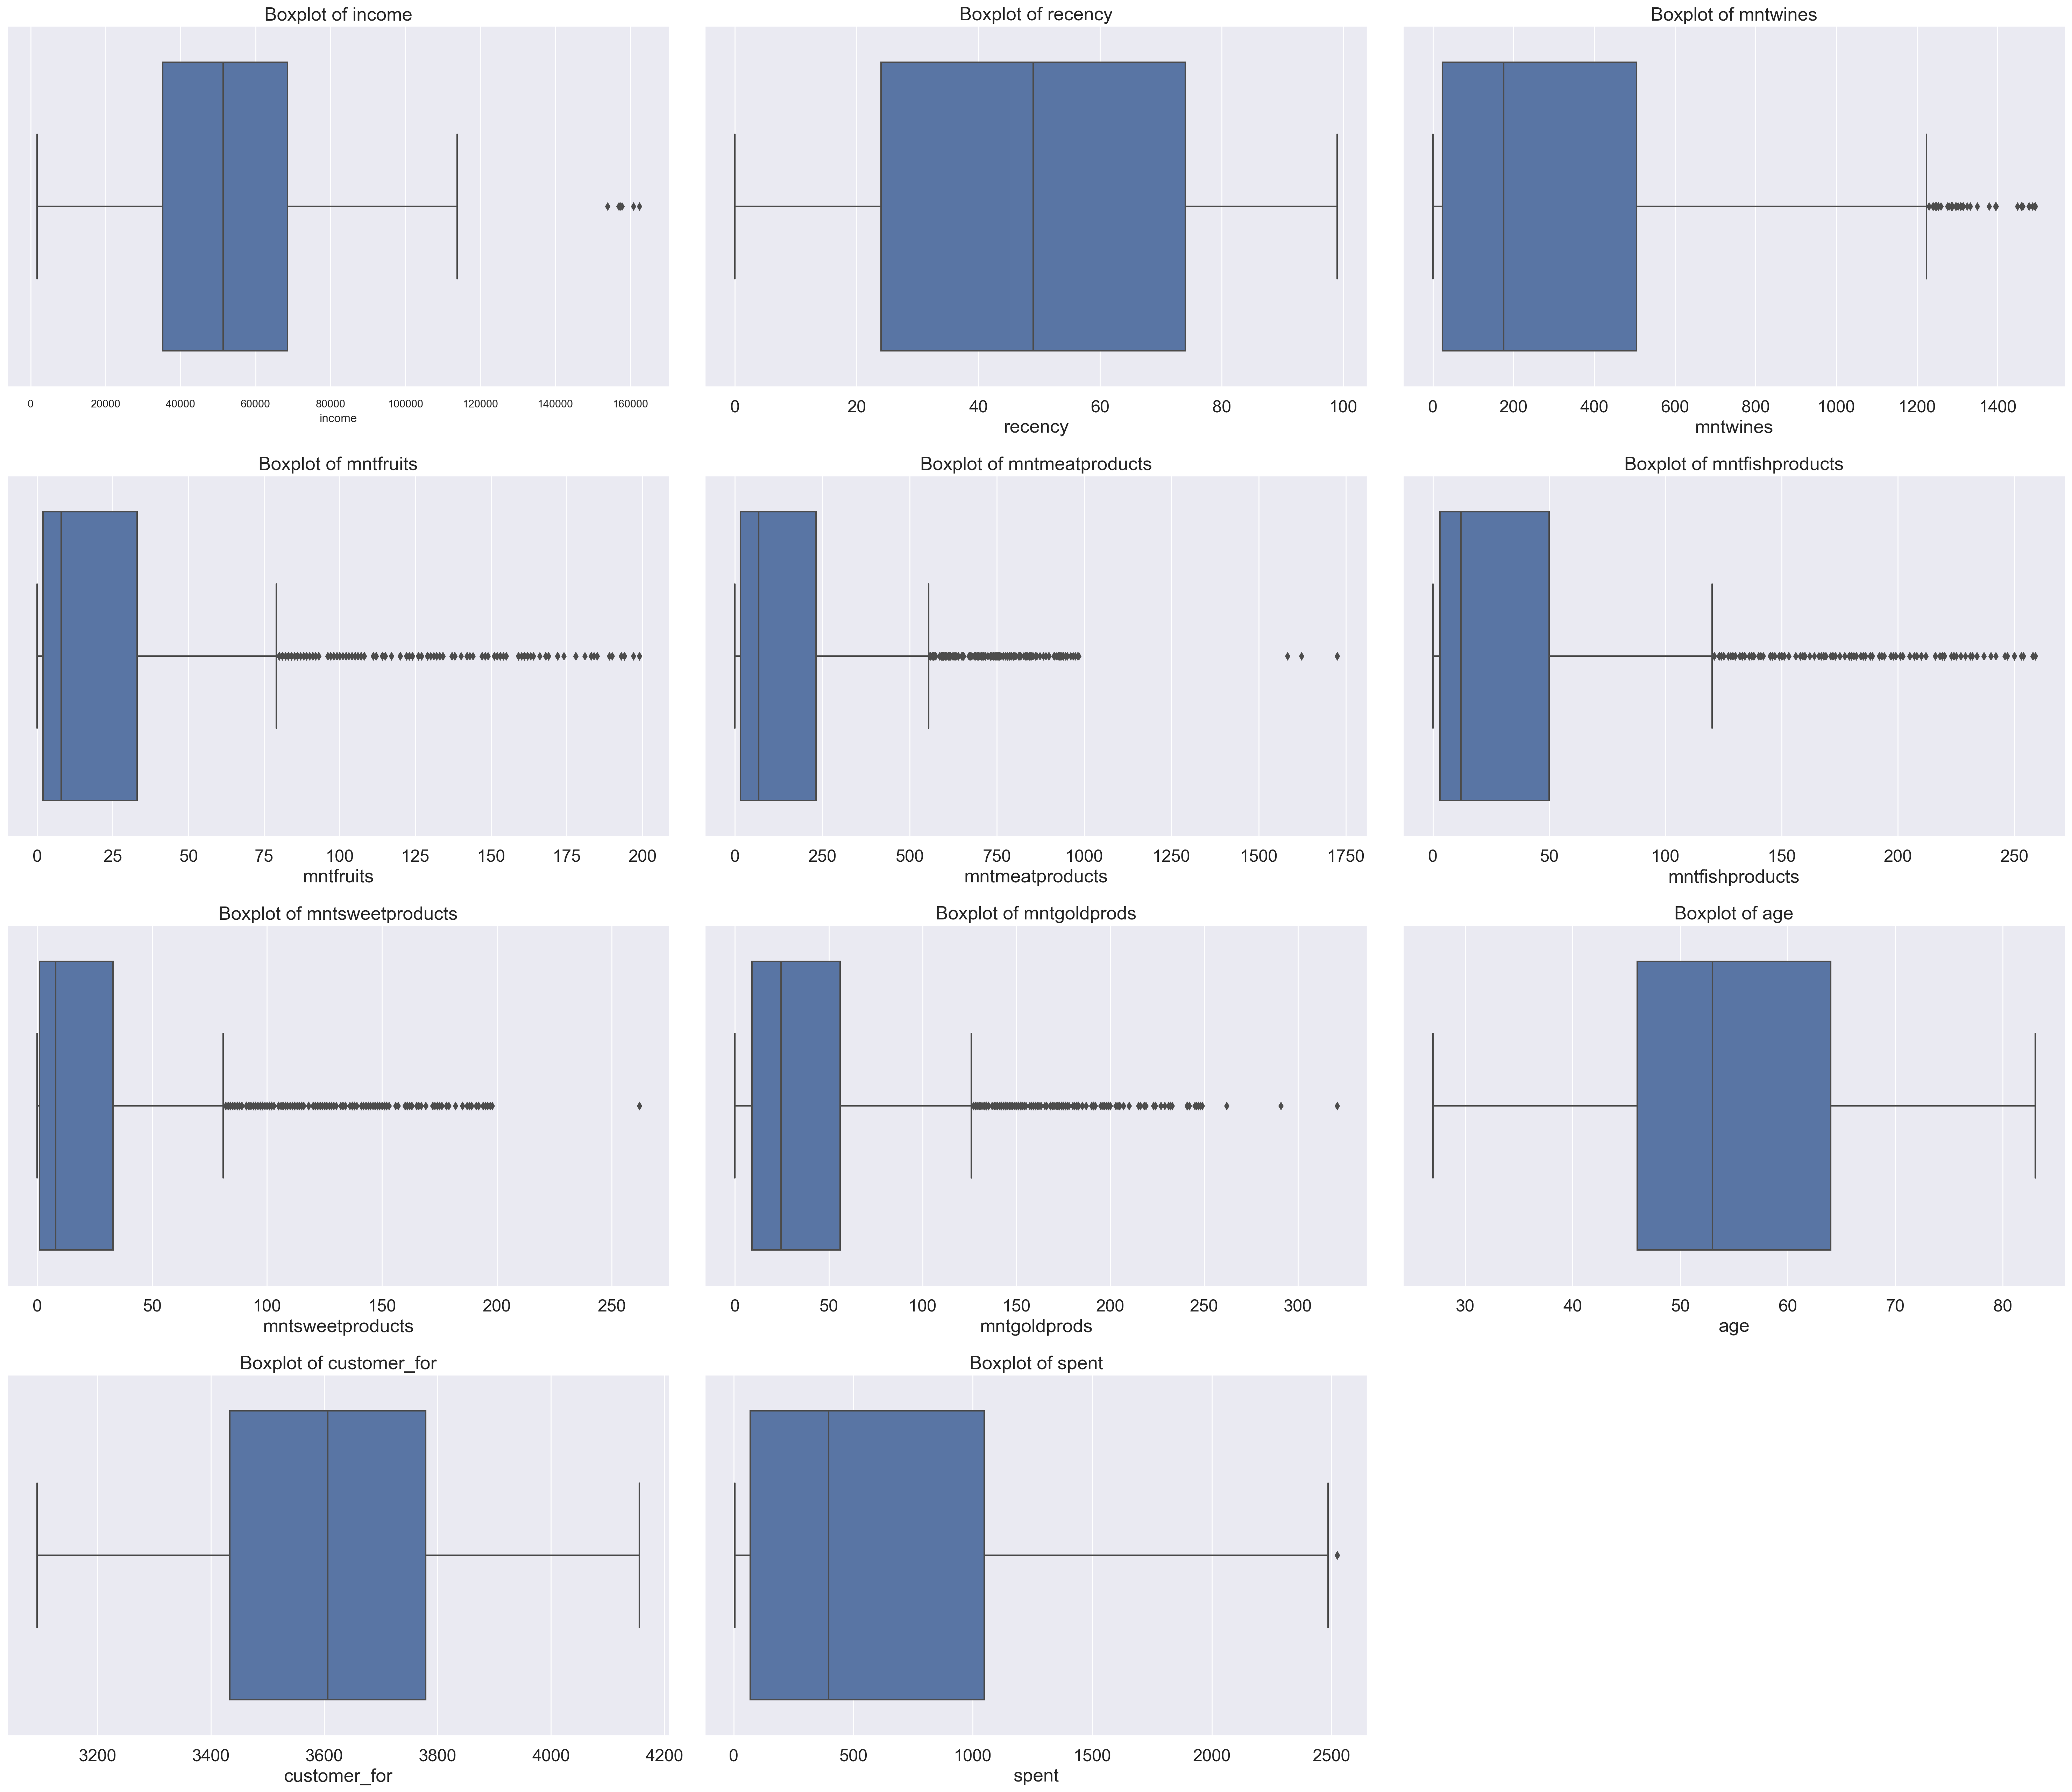

In [261]:
#visualize outliers with the help of boxplot
listc=[ 'income', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'age', 'customer_for', 'spent']
i=0
plt.figure(figsize=(30,26),dpi=200)
for i,item in enumerate(listc):
    ax=plt.subplot(4,3,i+1)
    sns.set(font_scale = 1.6)
    sns.boxplot(data=df,x=item,ax=ax)
    ax.set_title(f'Boxplot of {item}')
    i=i+1
plt.tight_layout()

In [262]:
#cap_floor_outliers(df,num_cols)

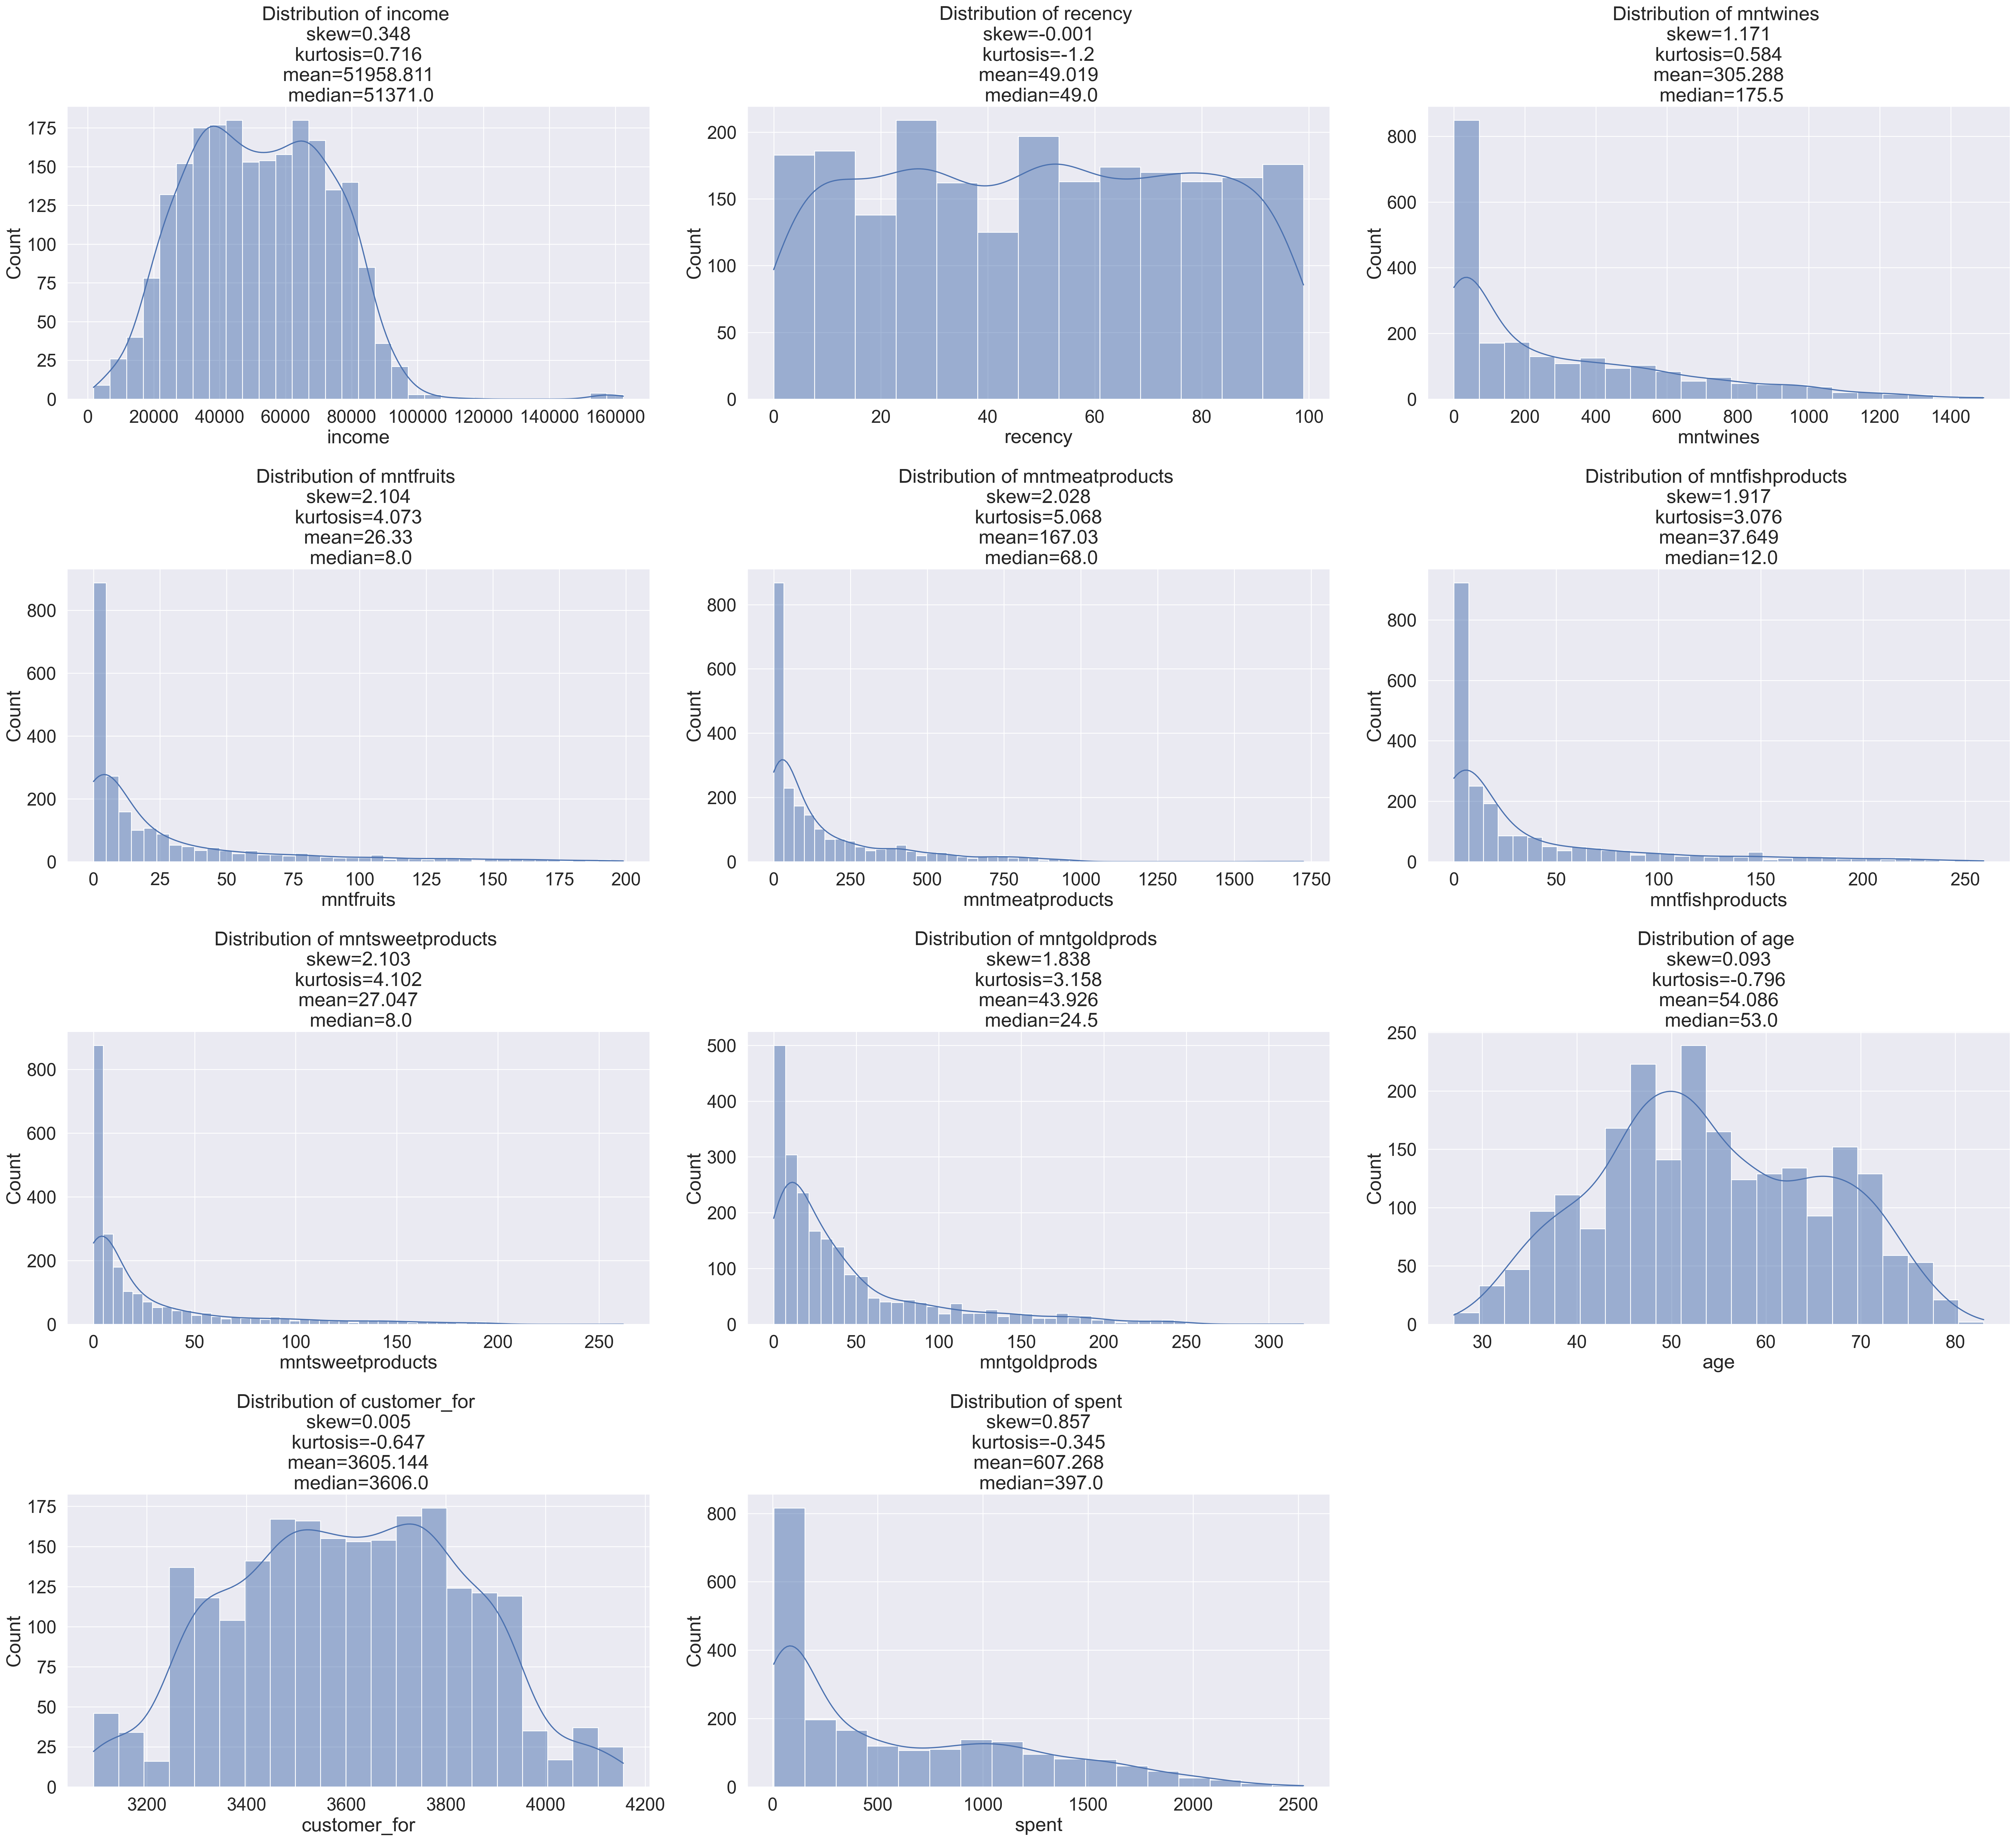

In [263]:
#univariate analysis for the numerical features
#histogram/skew(If the skewness is between -0.5 and 0.5, the data are fairly symmetrical)/kurtosis(Kurtosis=3 looks more close to a normal distribution)/mean/median

listc=[ 'income', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'age', 'customer_for', 'spent']
plt.figure(figsize=(35,32),dpi=200)
sns.set(font_scale = 2)
for j,col in enumerate(listc):
    plt.subplot(4,3,j+1)
    sns.histplot(data=df,x=df[col],kde=True)
    skew=np.round(df[col].skew(),3)
    kurtosis=np.round(df[col].kurtosis(),3)
    mean=np.round(df[col].mean(),3)
    median=np.round(df[col].median(),3)
    plt.title(f'Distribution of {col} \n skew={skew} \n kurtosis={kurtosis} \n mean={mean} \n median={median}')
    plt.tight_layout()
plt.show()

#mntWines/mntFruits/mntMeatProducts/mntFishProducts/mntSweetProducts/mntGoldProds/income/spent - right skewed/long tailed to the right
#age/Customer_for - fairly symmetric

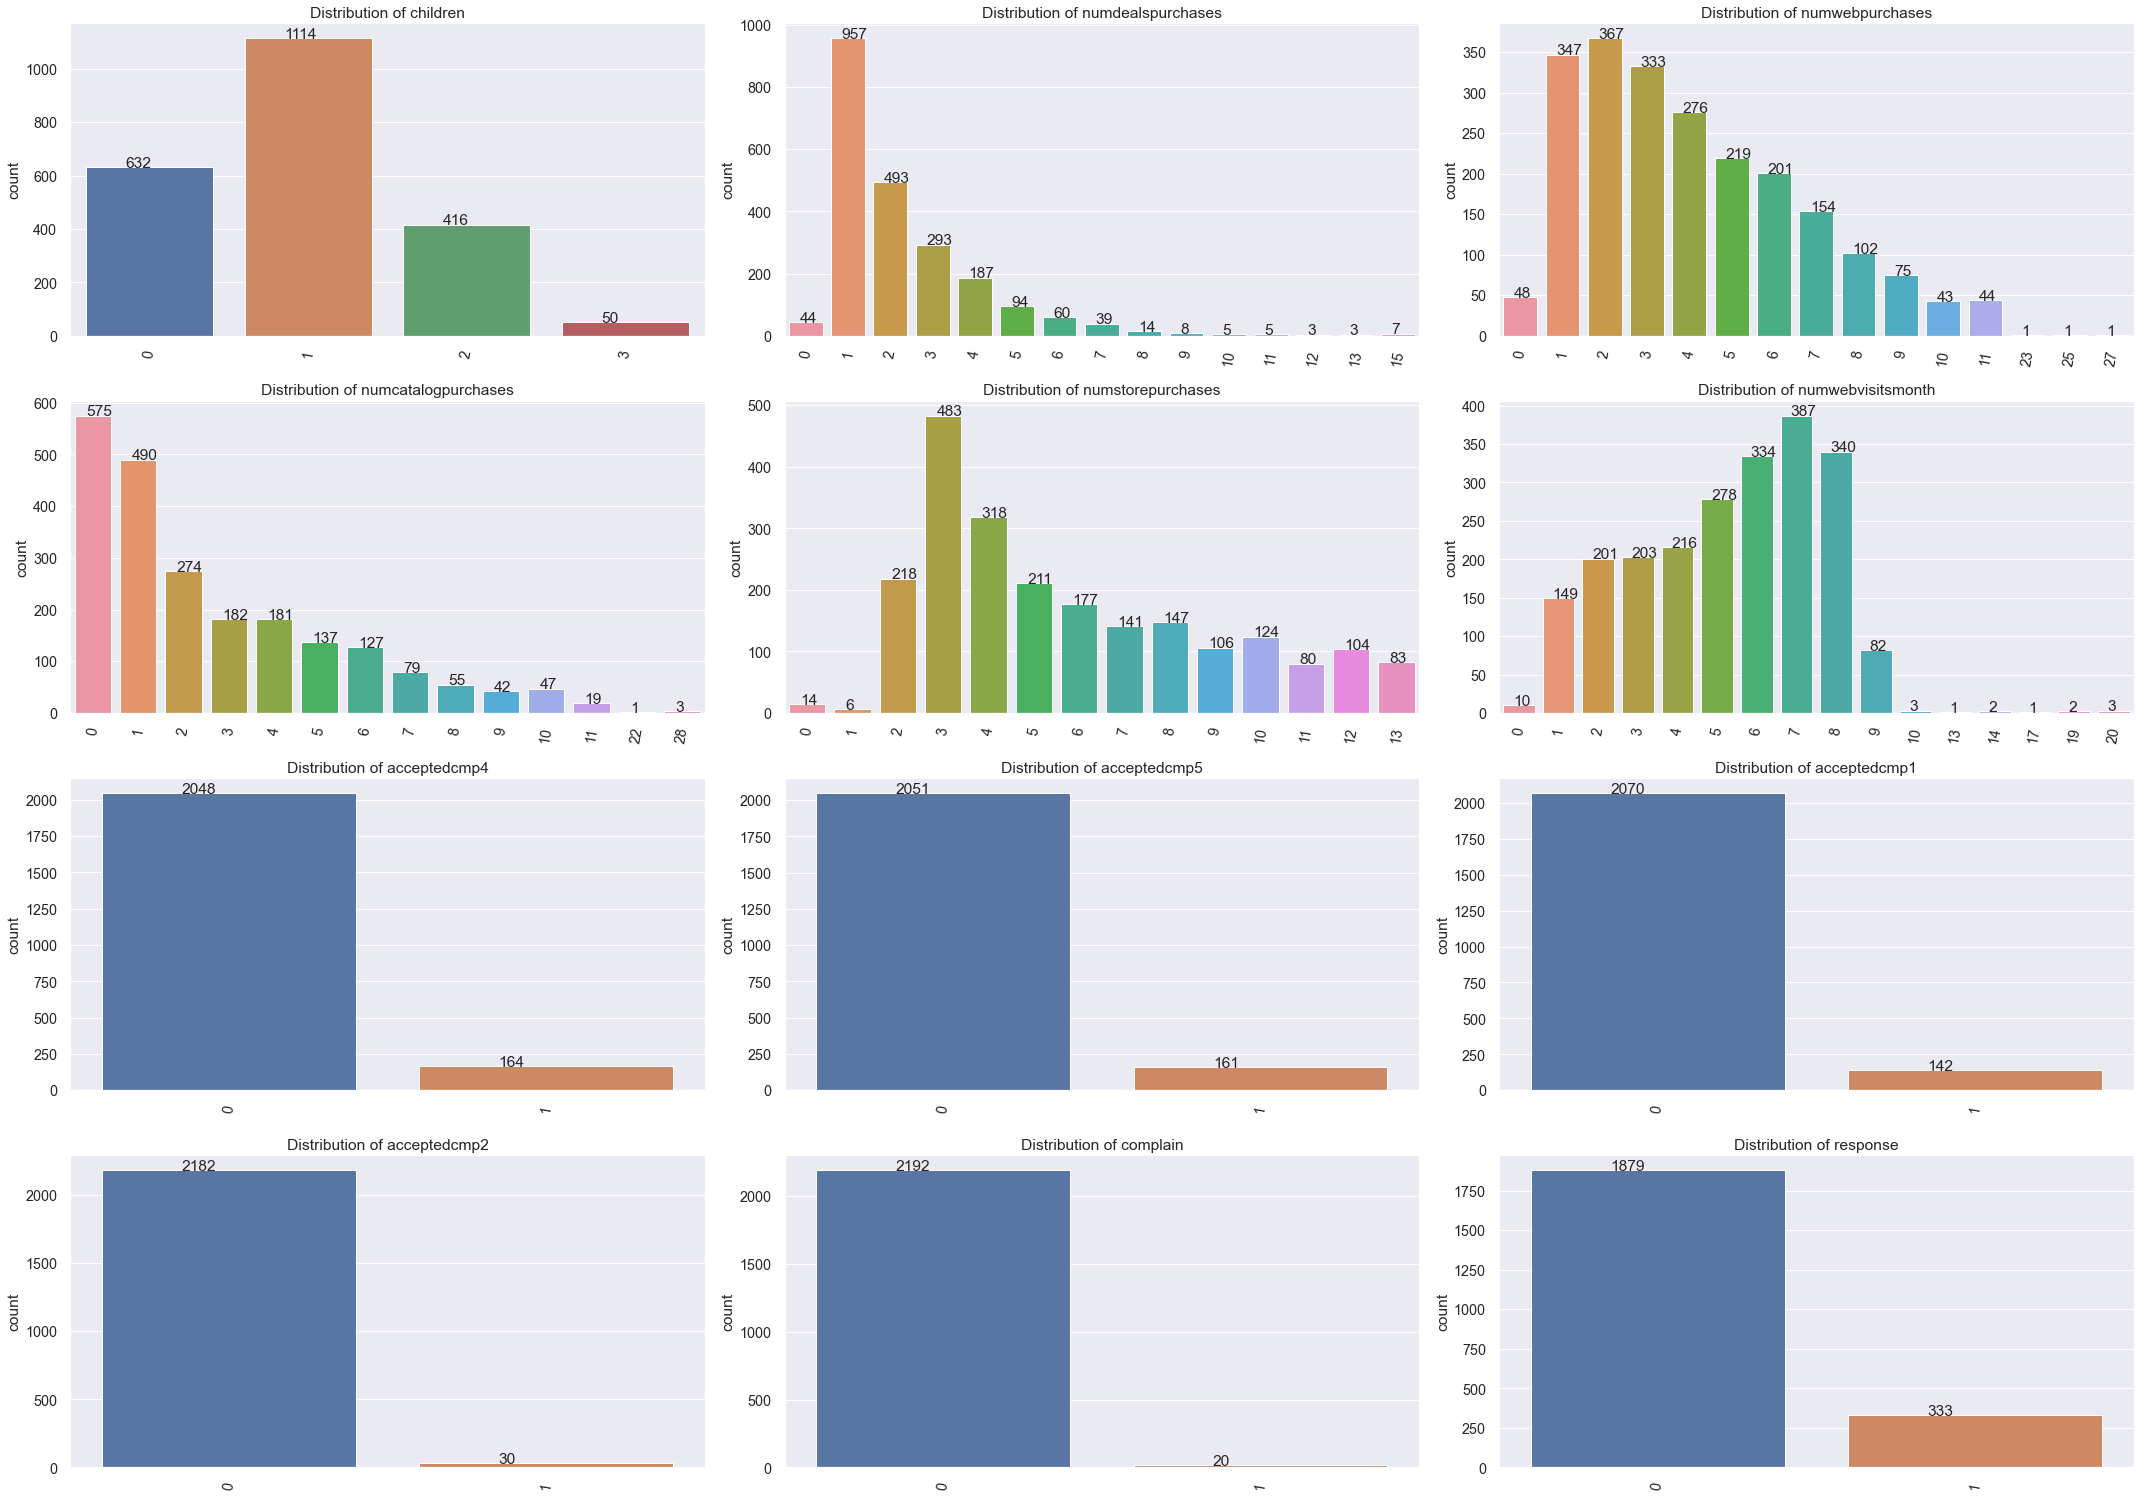

In [264]:
#plotting categorical variables
clist=[ 'children','numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
        'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response']
plt.figure(figsize=(30,26))

for i,item in enumerate(clist):
    sns.set(font_scale = 1.3)
    ax = plt.subplot(5,3,i+1)
    ax=sns.countplot(data=df,x=item)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {item}')
    plt.xticks(rotation=80);
    plt.tight_layout()
plt.show()

In [265]:
#frequency table of marital_status and education
pd.crosstab(df.marital_status, df.education).style.background_gradient(cmap='YlOrRd')

In [266]:
#frequency table of marital_status and number of web purchases
pd.crosstab(df.marital_status, df.numwebpurchases).style.background_gradient(cmap='YlOrRd')

In [267]:
##frequency table of marital_status and numstorepurchases
pd.crosstab(df.marital_status, df.numstorepurchases).style.background_gradient(cmap='YlOrRd')

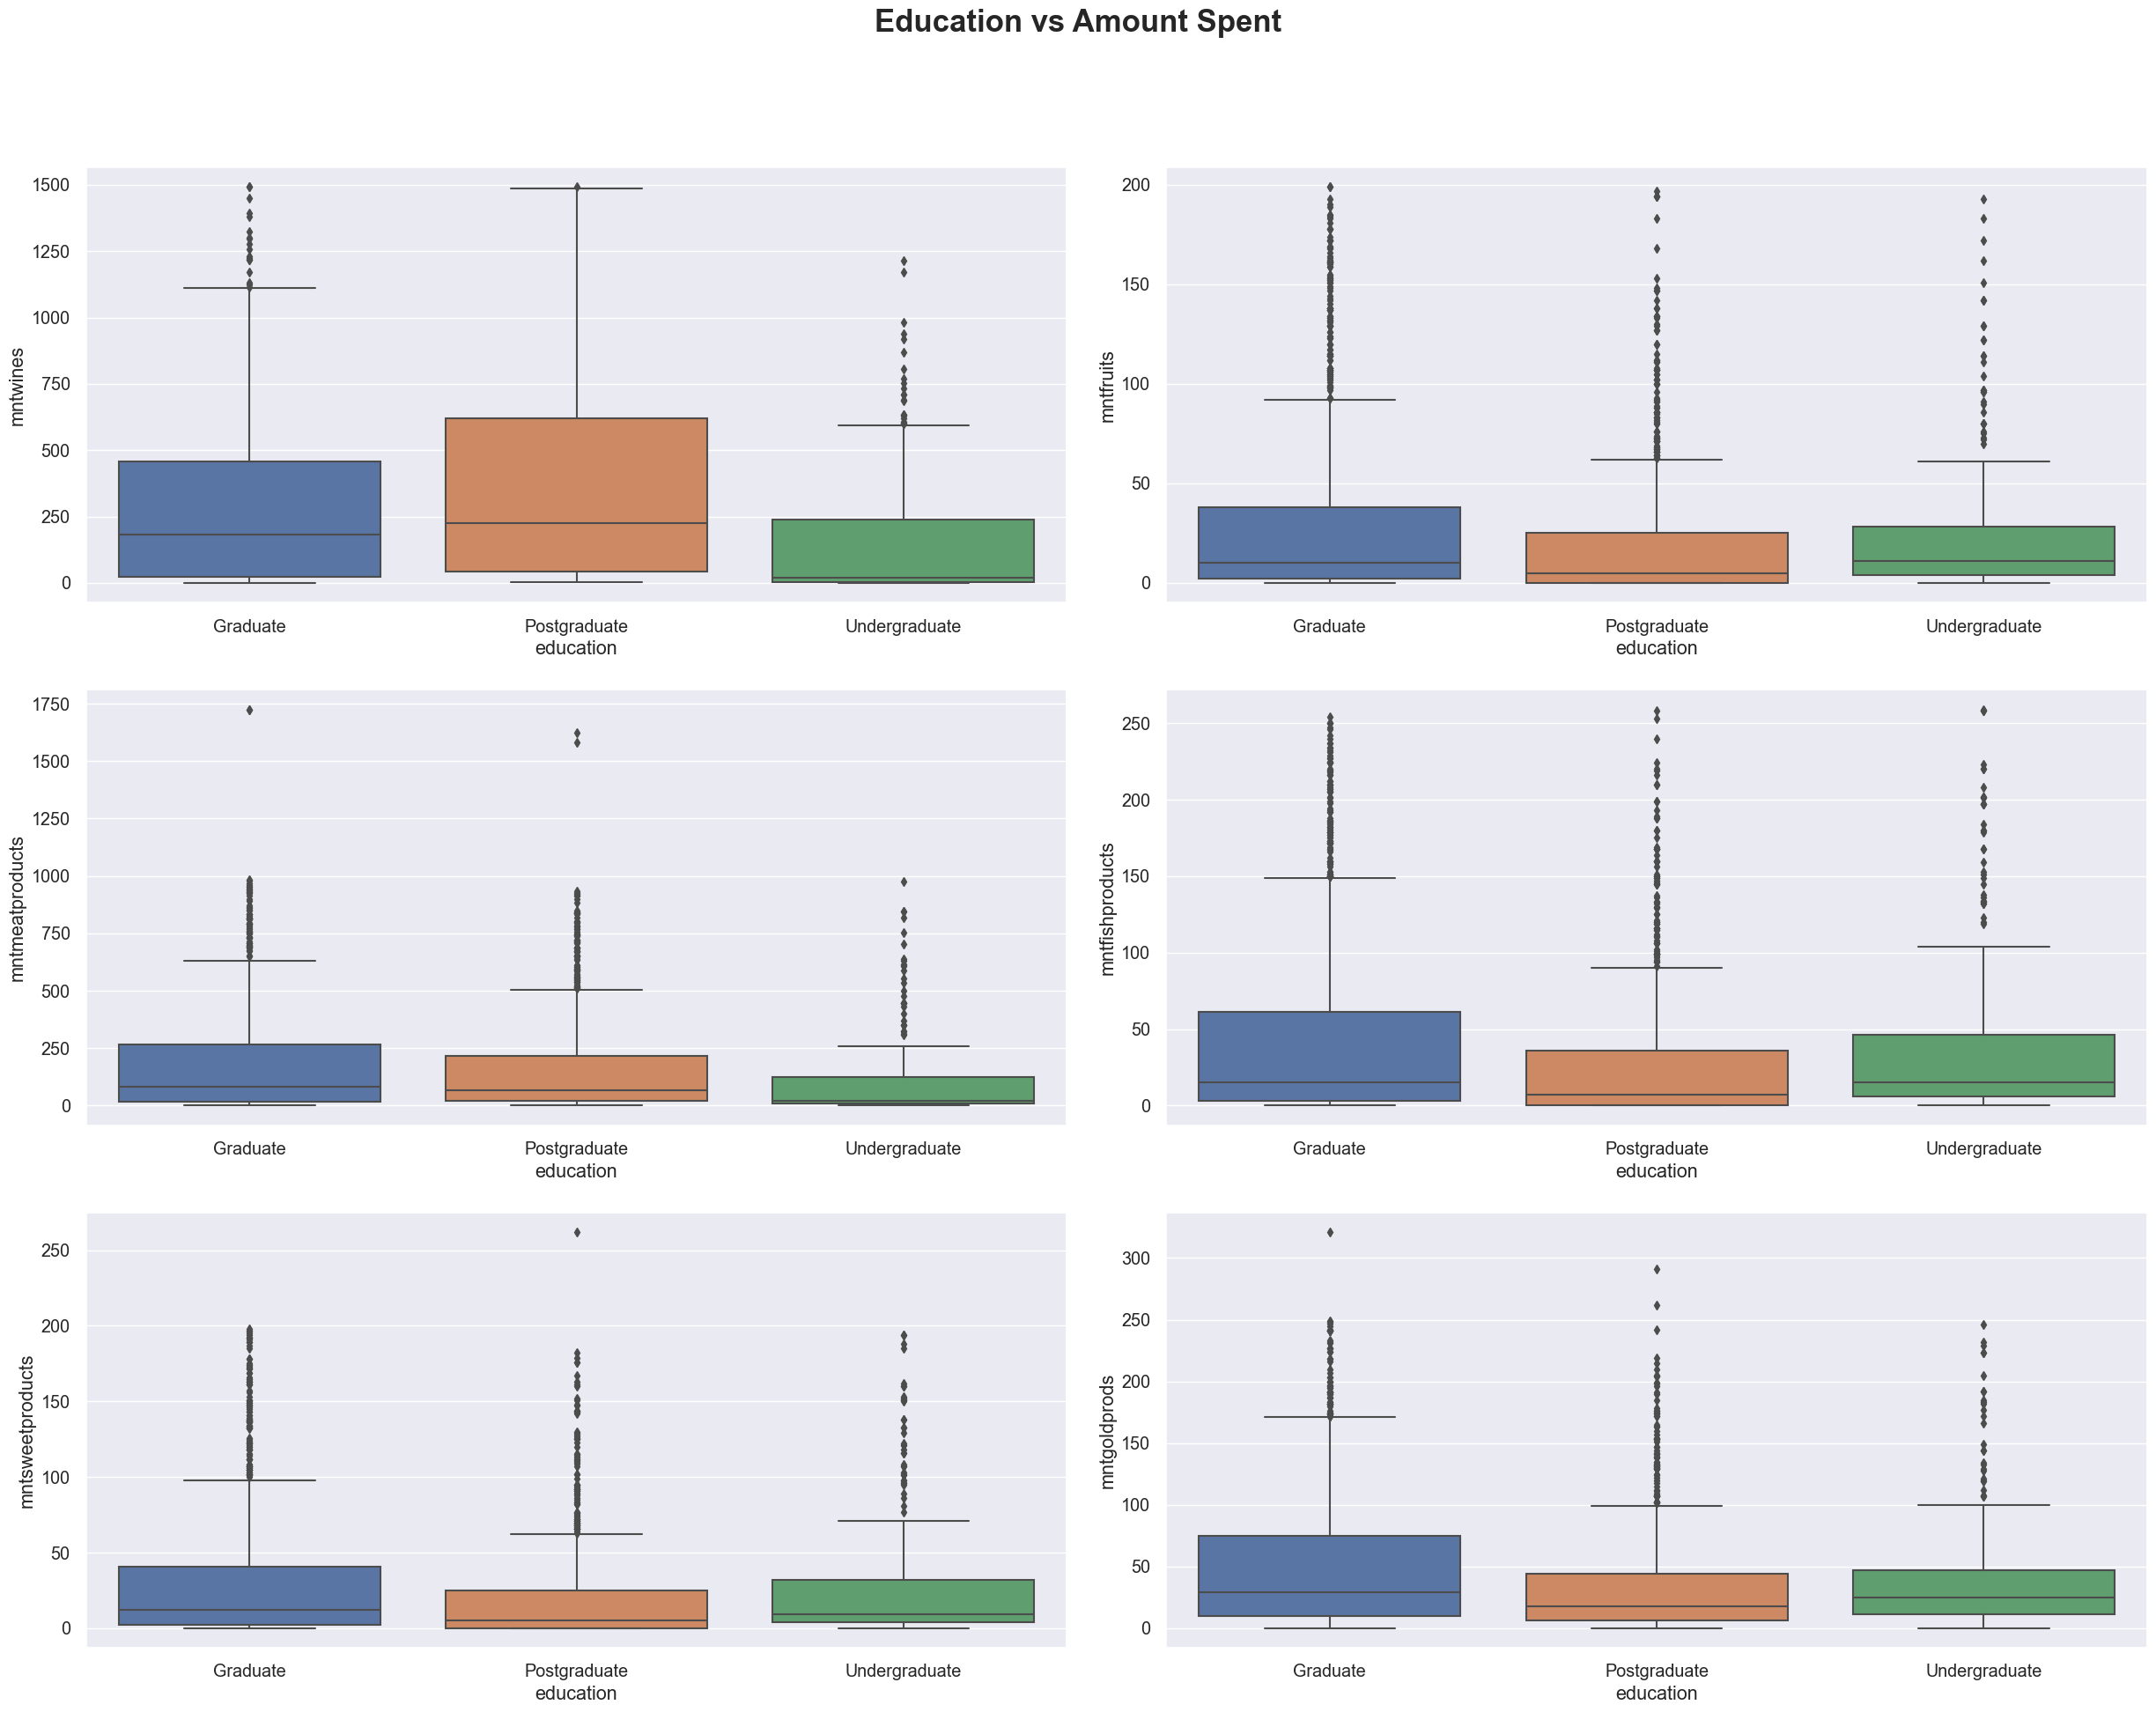

In [268]:
fig, ax = plt.subplots(3,2, figsize=(25, 20), dpi=100)
ax = ax.flatten()
sns.set(font_scale=2)
for i, ft in enumerate(['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']):
    sns.boxplot(data=df,y=ft, x=df['education'],ax=ax[i])
fig.suptitle(f'Education vs Amount Spent\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()



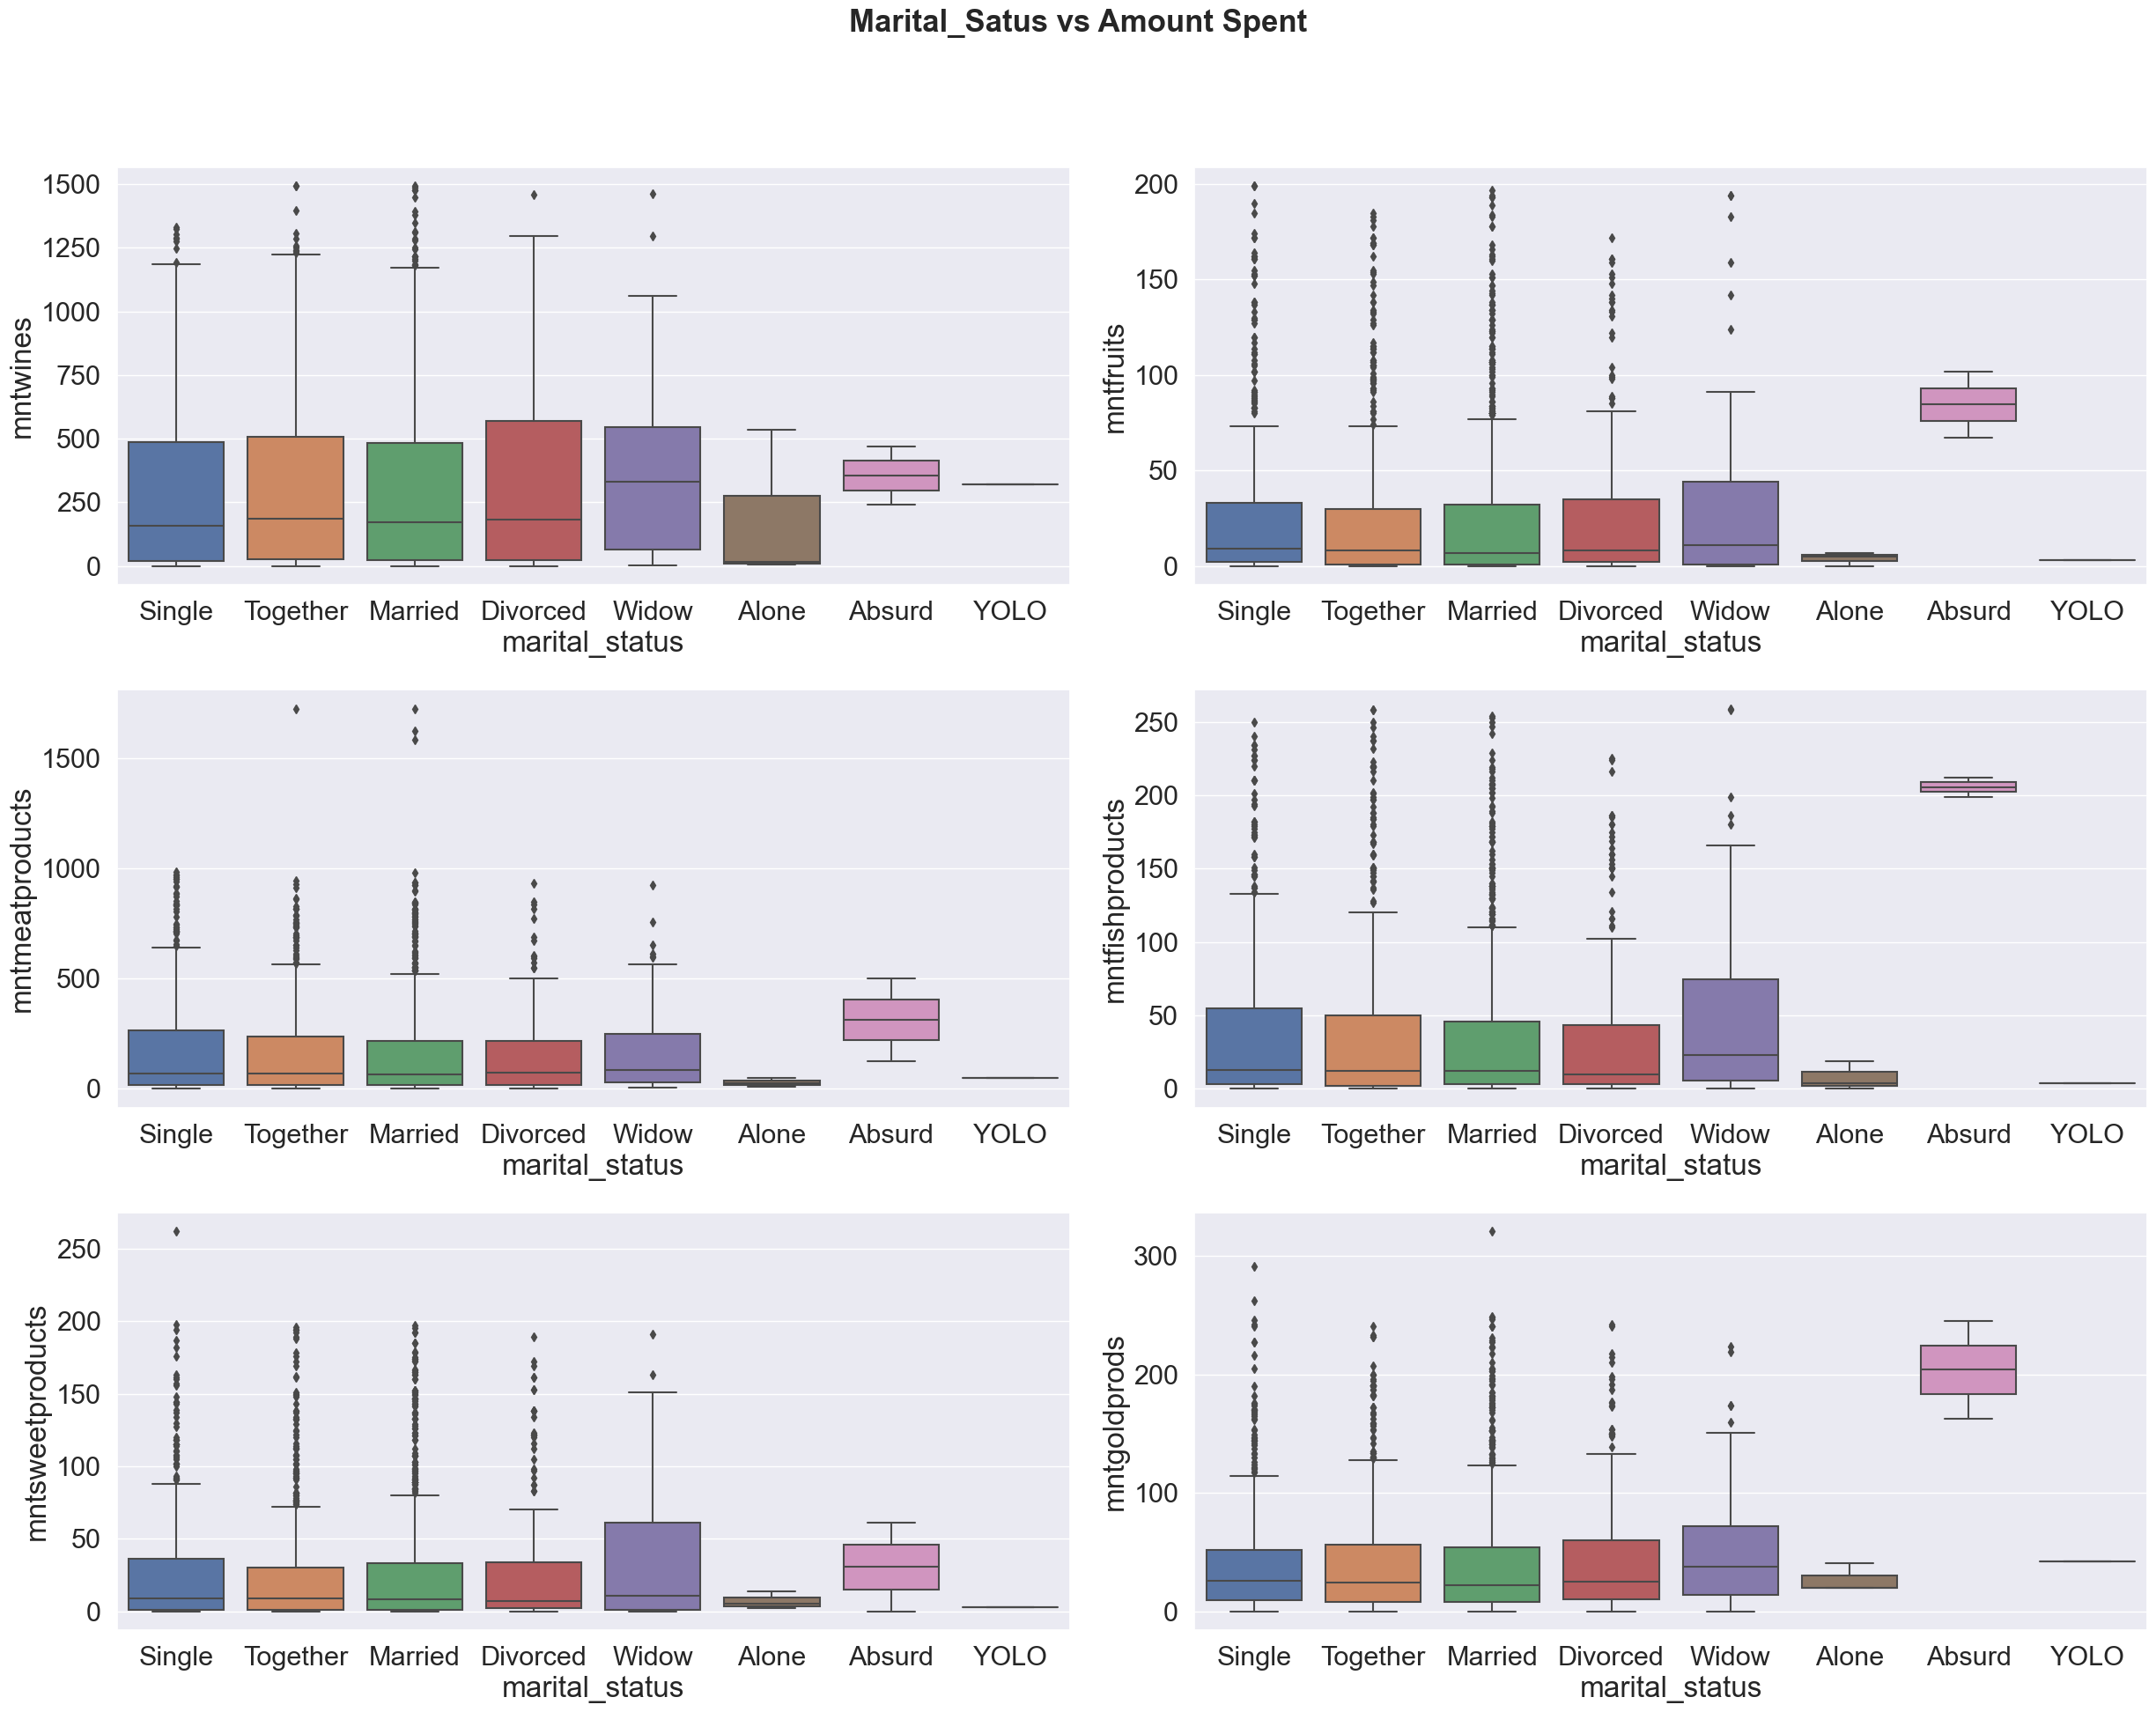

In [269]:
fig, ax = plt.subplots(3,2, figsize=(25, 20), dpi=100)
ax = ax.flatten()
sns.set(font_scale=2)
for i, ft in enumerate(['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']):
    sns.boxplot(data=df,y=ft, x=df['marital_status'],ax=ax[i])
fig.suptitle(f'Marital_Satus vs Amount Spent\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [270]:
#frequency table of accepted campaigns per education
pd.pivot_table(data=df[['education','acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5']],  values=['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5'], columns='education', aggfunc='sum').style.background_gradient(cmap='YlOrRd')

In [271]:
#frequency of accepted campaigns per marital status
pd.pivot_table(data=df[['marital_status','acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5']],  values=['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5'], columns='marital_status', aggfunc='sum').style.background_gradient(cmap='YlOrRd')

In [272]:
#frequency of purchases per education
pd.pivot_table(data=df[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth','education']],values=['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth'],columns='education',aggfunc='sum').style.background_gradient(cmap='YlOrRd')

In [273]:
#frequency of purchases per marital status
pd.pivot_table(data=df[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth','marital_status']],values=['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth'],columns='marital_status',aggfunc='sum').style.background_gradient(cmap='YlOrRd')

In [274]:
#frequency of complains per marital status
pd.pivot_table(data=df[['complain','marital_status']],values=['complain'],columns='marital_status',aggfunc='sum').style.background_gradient(cmap='YlOrRd')

In [275]:
#frequency of complains per education
pd.pivot_table(data=df[['complain','education']],values=['complain'],columns='education',aggfunc='sum').style.background_gradient(cmap='YlOrRd')

In [276]:
#Dropping some of the redundant features
to_drop = ['dt_customer',"z_costcontact", "z_revenue", "id","year_birth",'marital_status',
           'kidhome','teenhome','acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','response']
df = df.drop(to_drop, axis=1)

In [277]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(exclude='number').columns

In [278]:
#create pipelines for data processing.
#Numerical features are imputed and scaled.Categorical features are imputed and encoded.
num_pipeline=Pipeline([('imputer',KNNImputer(missing_values=np.nan,n_neighbors=3)),('scale',StandardScaler())])
cat_pipeline=Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(drop='first'))])

In [279]:
preprocessed=ColumnTransformer(transformers=[('num_transf',num_pipeline,num_cols),('cat_transf',cat_pipeline,cat_cols)])
preprocessed.fit(df)

ColumnTransformer(transformers=[('num_transf',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('scale', StandardScaler())]),
                                 Index(['income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'complain', 'customer_for',
       'age', 'spent', 'children', 'total_acc_cmp', 'numtotalpurchases'],
      dtype='object')),
                                ('cat_transf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['education', 'living_with'], dtype='object'))])

In [280]:
categorical_col_names=preprocessed.named_transformers_['cat_transf']['ohe'].get_feature_names_out(cat_cols)
numerical_col_names=preprocessed.named_transformers_['num_transf']['scale'].get_feature_names_out(num_cols)

In [281]:
df_preprocessed=pd.DataFrame(data=preprocessed.transform(df),columns=np.append(numerical_col_names,categorical_col_names))
df_preprocessed.head()

income   recency  mntwines  mntfruits  mntmeatproducts  mntfishproducts  \
0  0.287105  0.310353  0.977660   1.552041         1.690293         2.453472   
1 -0.260882 -0.380813 -0.872618  -0.637461        -0.718230        -0.651004   
2  0.913196 -0.795514  0.357935   0.570540        -0.178542         1.339513   
3 -1.176114 -0.795514 -0.872618  -0.561961        -0.655787        -0.504911   
4  0.294307  1.554453 -0.392257   0.419540        -0.218684         0.152508   

   mntsweetproducts  mntgoldprods  numdealspurchases  numwebpurchases  ...  \
0          1.483713      0.852576           0.351030         1.426865  ...   
1         -0.634019     -0.733642          -0.168701        -1.126420  ...   
2         -0.147184     -0.037254          -0.688432         1.426865  ...   
3         -0.585335     -0.752987          -0.168701        -0.761665  ...   
4         -0.001133     -0.559545           1.390492         0.332600  ...   

   complain  customer_for       age     spent  children  total_acc_cmp  \
0  -0.09552      1.973583  1.018352  1.676245 -1.264598       0.617244   
1  -0.09552     -1.665144  1.274785 -0.963297  1.404572      -0.502808   
2  -0.09552     -0.172664  0.334530  0.280110 -1.264598      -0.502808   
3  -0.09552     -1.923210 -1.289547 -0.920135  0.069987      -0.502808   
4  -0.09552     -0.822130 -1.033114 -0.307562  0.069987      -0.502808   

   numtotalpurchases  education_Postgraduate  education_Undergraduate  \
0           1.317945                     0.0                      0.0   
1          -1.159273                     0.0                      0.0   
2           0.796425                     0.0                      0.0   
3          -0.898513                     0.0                      0.0   
4           0.535666                     1.0                      0.0   

   living_with_partner  
0                  0.0  
1                  0.0  
2                  1.0  
3                  1.0  
4                  1.0  

[5 rows x 23 columns]

In [282]:
#Feature selector that removes all low-variance features. 
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.0)
_ = vt.fit(df_preprocessed)
mask = vt.get_support()

In [283]:
mask#keep all features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [284]:
def get_feature_correlation(df,top_n=None,corr_method='spearman'):
    corr_matrix_abs=df.corr(method=corr_method).abs()
    corr_matrix_us=corr_matrix_abs.unstack()
    sorted_correlated_features=corr_matrix_us.sort_values(kind="quicksort", ascending=False).reset_index()
    sorted_correlated_features=sorted_correlated_features[sorted_correlated_features['level_0']!=sorted_correlated_features['level_1']]
    sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

In [285]:
get_feature_correlation(df_preprocessed)

Feature 1            Feature 2  Correlation (abs)
23                    spent      mntmeatproducts           0.940091
25                 mntwines                spent           0.928360
27                    spent  numcatalogpurchases           0.893963
29        numstorepurchases    numtotalpurchases           0.869371
31                    spent    numtotalpurchases           0.865411
..                      ...                  ...                ...
517        mntsweetproducts                  age           0.001885
519  education_Postgraduate  living_with_partner           0.000985
521                complain                  age           0.000890
523     living_with_partner             complain           0.000885
525     living_with_partner    numtotalpurchases           0.000576

[252 rows x 3 columns]

<AxesSubplot:>

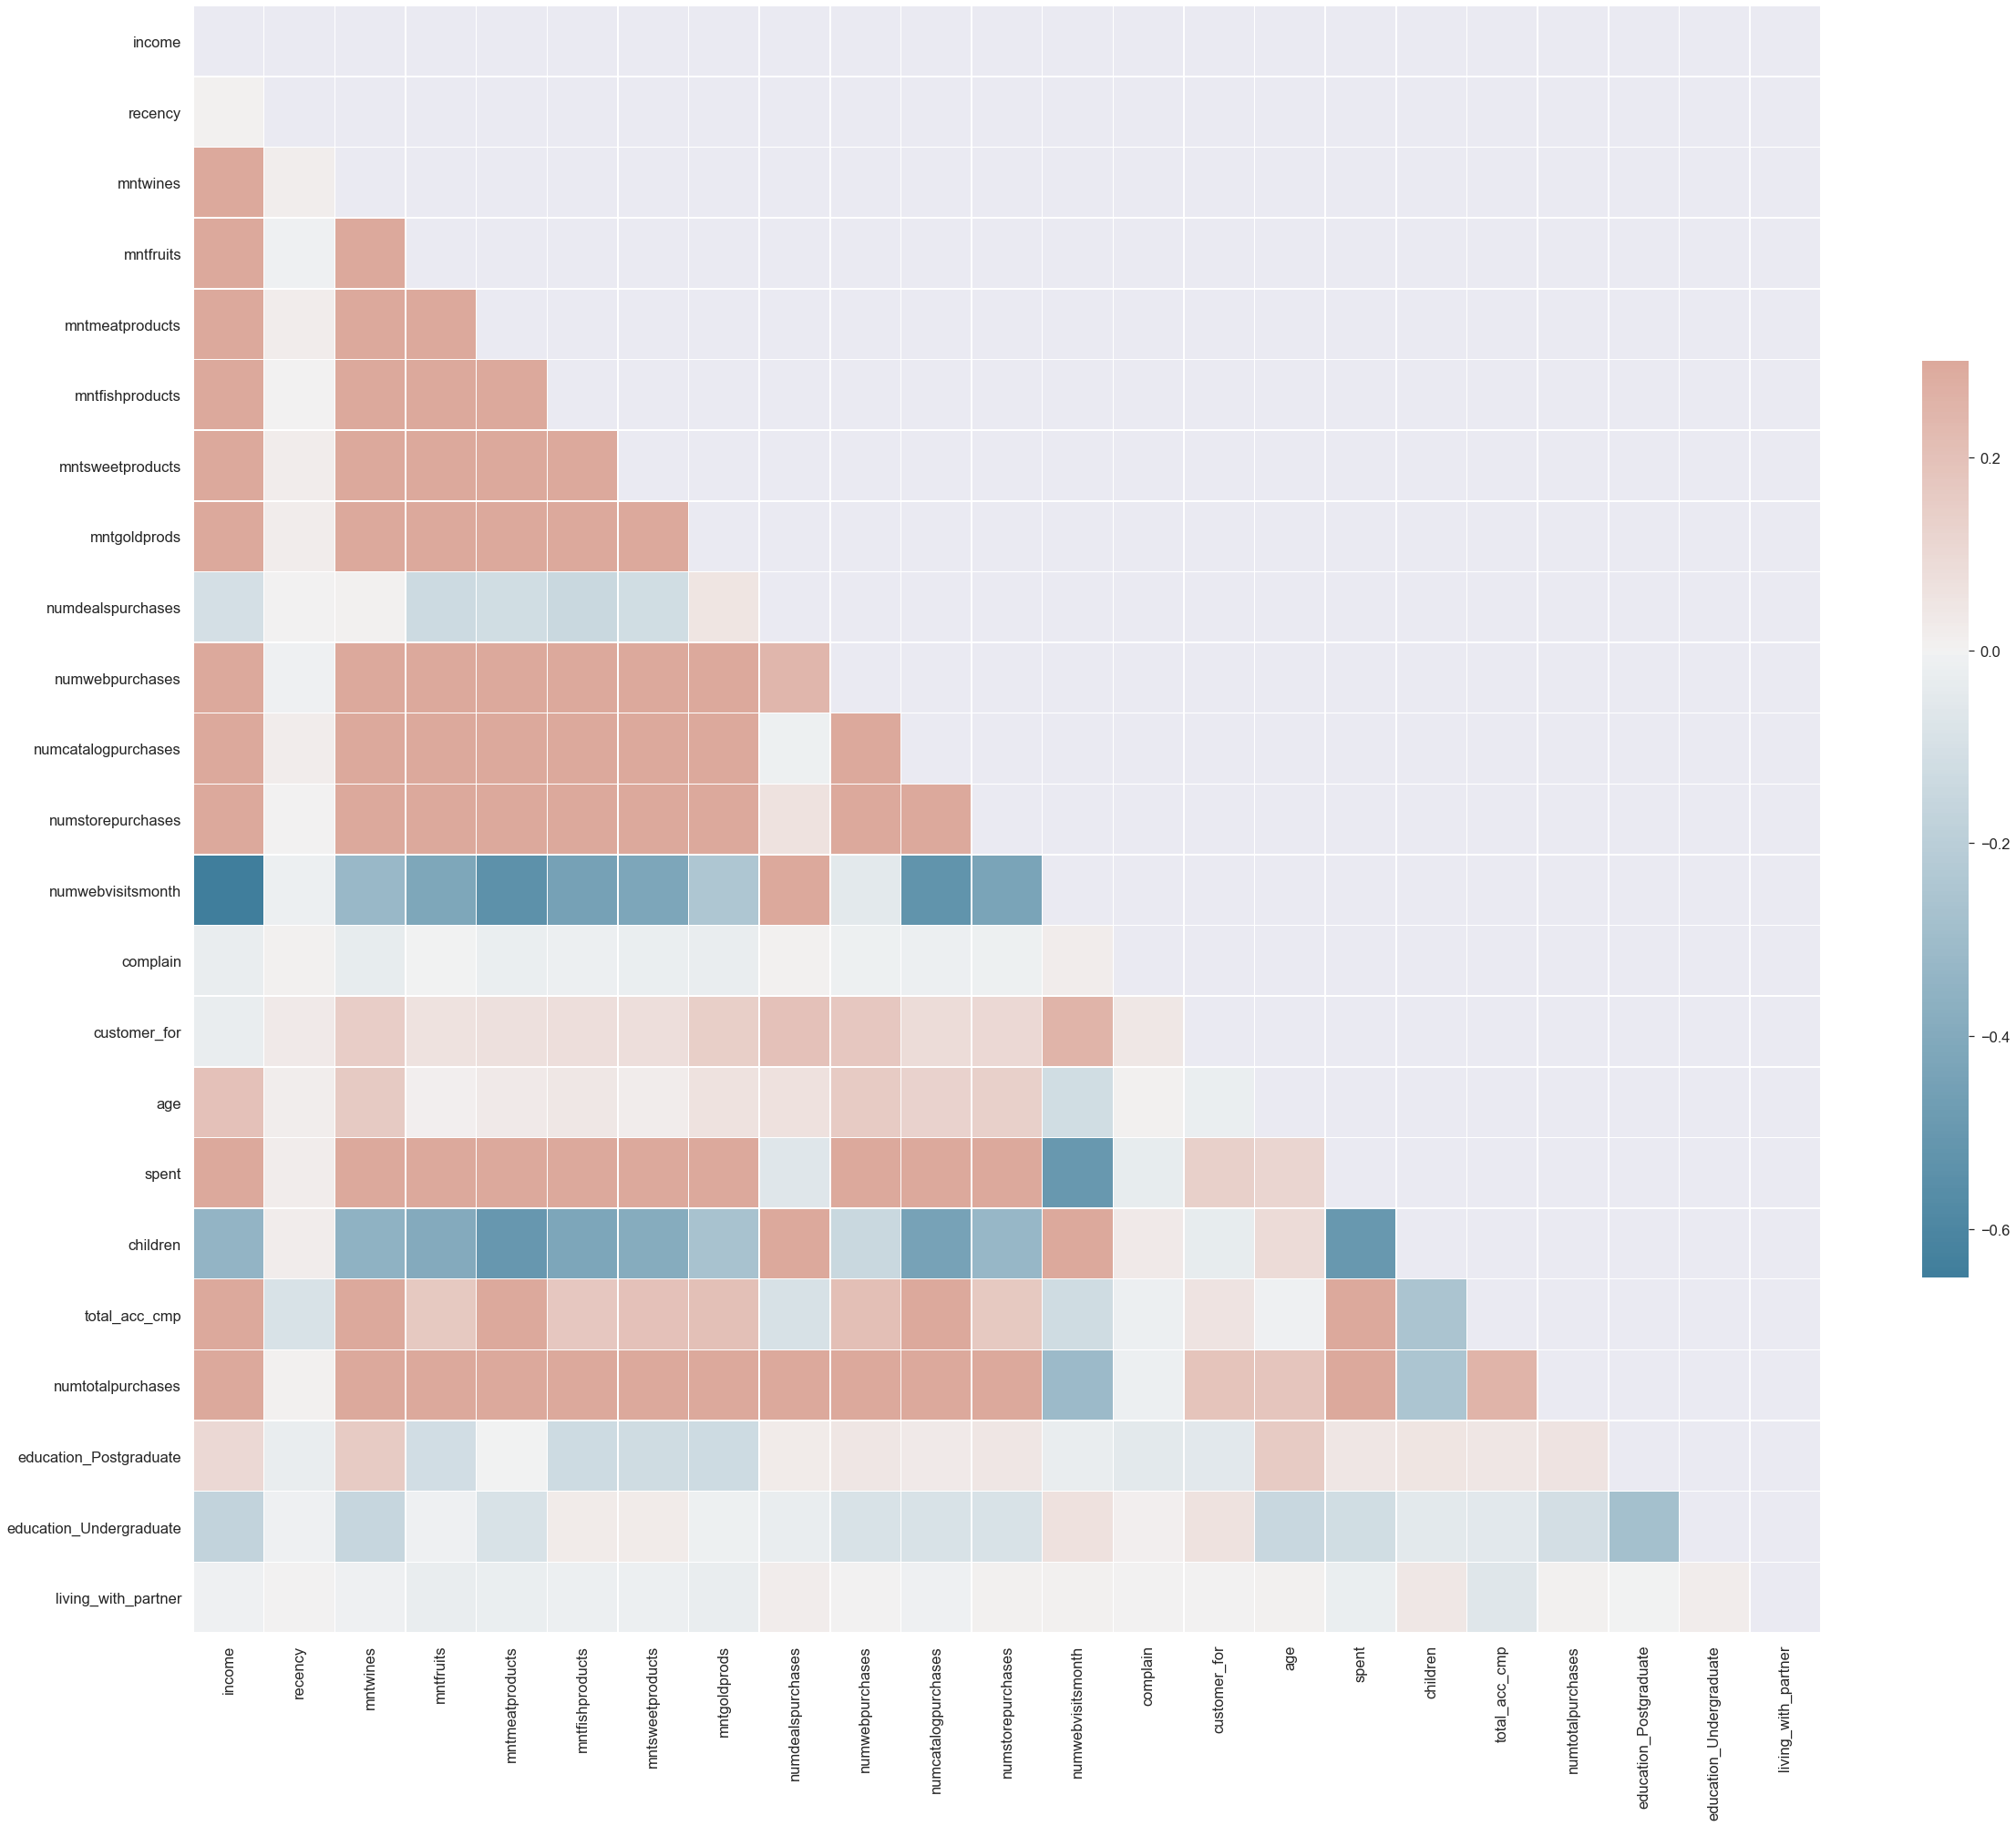

In [286]:
#correlation matrix
corr=df_preprocessed.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(40,37))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#numwebvisitsmonth is stronly negatively correlated with income and spent
#spent is strongly negatively correlated with children

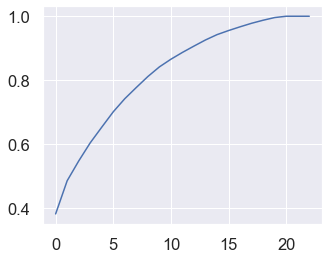

In [287]:
#dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit(df_preprocessed)
plt.figure(figsize=(5,4))
plt.plot(range(0,23),np.cumsum(X_pca.explained_variance_ratio_))
plt.grid(True)

In [288]:
#keep 3 components only to combine into 3 clusters
pca=PCA(n_components=3)
X_pca=pca.fit(df_preprocessed)
X_pca.n_components_

3

In [289]:
#new dataframe with only 3 components
X_new=X_pca.fit_transform(df_preprocessed)
X_new_df=pd.DataFrame(data=X_new,columns=['c1','c2','c3'])
X_new_df.head(3)

c1        c2        c3
0  4.561001  0.873870  1.938678
1 -2.871979 -0.800676 -2.112806
2  1.981603 -0.231779 -0.329850

In [290]:
#dictionary to save results 
model_data={
            'model':[],
            'dunn':[],
            'silhouette':[],
            'davis-b':[],
            'calinsky-h':[],
            'time_taken':[]
           }

In [291]:
import time
import matplotlib.cm as cm
#function that calculates metrics and execution times
def run_model(model, X, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X, verbose=0)
    else:
        model.fit(X)
    #dunn=base.dunn(scaled_data,cluster_labels)
    cluster_labels=model.fit_predict(X)
    #silhouette score
    ss=silhouette_score(X,cluster_labels)
    #Davis-Bouldin score
    db=davies_bouldin_score(X, cluster_labels)
    #Calinski-Harabasz score
    ch = calinski_harabasz_score(X, cluster_labels)
    time_taken = round(time.time()-t0,3)

    #print("dunn = {}".format(mae))
    print("silhouette = {}".format(ss))
    print("davis-b = {}".format(db))
    print("calinski-h = {}".format(ch))
    print("Time taken = {}".format(time_taken))
    
    #2D scatterplot c1 vs c2 to see how well get separated
    X_new_df['clusterL']=cluster_labels
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=X_new_df,x='c1',y='c2',hue='clusterL',palette="tab10")
    
    #3D plot to see how well are sparated the 3 features
    plt.figure(figsize=(6,5))
    axes = plt.axes(projection='3d')
    axes.scatter3D(X_new_df['c1'], X_new_df['c2'], X_new_df['c3'],c=X_new_df['clusterL'],cmap=cm.tab10)
    X_new_df.drop(['clusterL'],axis=1,inplace=True)
    
    return str(model)[:10],ss,db,ch,time_taken,cluster_labels

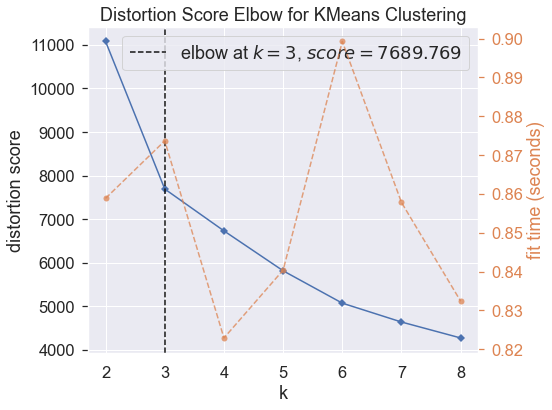

In [292]:
#KMeans
#Elbow graph to choose the number of clusters
from sklearn.cluster import KMeans
plt.figure(figsize=(7,6))
Elbow_M = KElbowVisualizer(KMeans(), k=(2,9),metric='distortion')
Elbow_M.fit(X_new_df)
Elbow_M.show();

silhouette = 0.4214191822688487
davis-b = 0.938252616648048
calinski-h = 2474.460588985448
Time taken = 3.22


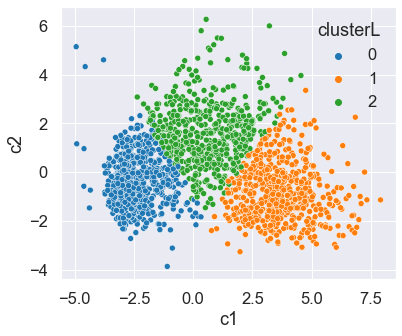

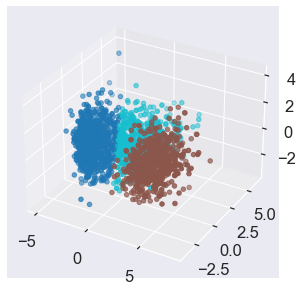

In [293]:
k_params={'init':'k-means++','n_init':20,'tol': 0.01}
kmmodel=KMeans(n_clusters=3,**k_params)
model, ss,db,ch,time_taken,cluster_labels= run_model(kmmodel, X_new_df)
model_data['model'].append(model)
model_data['silhouette'].append(ss)
model_data['davis-b'].append(db)
model_data['calinsky-h'].append(ch)
model_data['time_taken'].append(time_taken)
clusterH_labels=cluster_labels

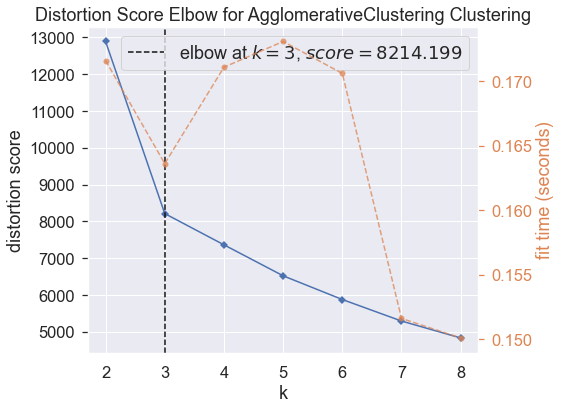

In [294]:
#Hierarchical Clustering
#Elbow graph to help choose the right number of clusters
plt.figure(figsize=(7,6))
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2,9),metric='distortion')
Elbow_M.fit(X_new_df)
Elbow_M.show();

silhouette = 0.29312009845333414
davis-b = 1.0725182968478182
calinski-h = 1753.7964177214915
Time taken = 0.418


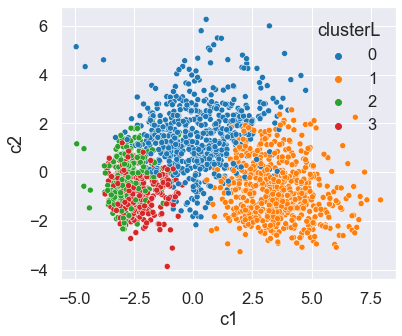

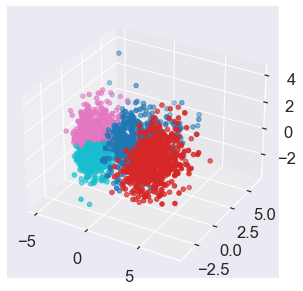

In [295]:
from sklearn.cluster import AgglomerativeClustering
aggmodel=AgglomerativeClustering(n_clusters=4,linkage='ward')
model, ss,db,ch,time_taken,cluster_labels= run_model(aggmodel, X_new_df)
model_data['model'].append(model)
model_data['silhouette'].append(ss)
model_data['davis-b'].append(db)
model_data['calinsky-h'].append(ch)
model_data['time_taken'].append(time_taken)
clusterA_labels=cluster_labels

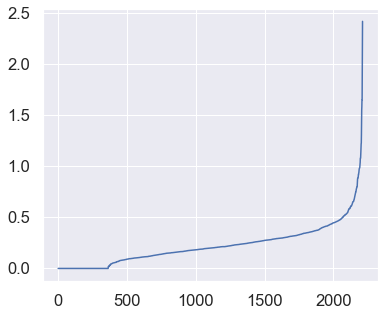

In [296]:
#DBSCAN
#Nearest Neighbors to choose the epsilon parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_new_df)
distances, indices = nbrs.kneighbors(X_new)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,5))
plt.plot(distances)

In [297]:
#use outliers percent to help choose the right epsilon
outlier_percent=[]
for e in np.linspace(0.001,3,100):
    dbmodel=DBSCAN(eps=e,min_samples=df.shape[1]*2)
    dbmodel.fit(X_new)
    perc_outliers = 100 * np.sum(dbmodel.labels_ == -1) / len(dbmodel.labels_)
    outlier_percent.append(perc_outliers)

<AxesSubplot:>

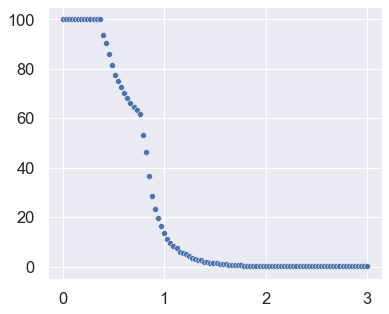

In [298]:
#outlier_percent
plt.figure(figsize=(6,5))
sns.scatterplot(x= np.linspace(0.001,3,100),y=outlier_percent)

silhouette = 0.29312009845292203
davis-b = 1.0725182968478182
calinski-h = 1753.7964177214915
Time taken = 0.465


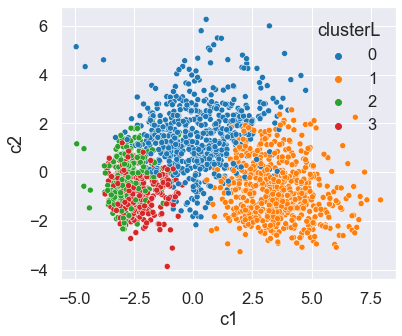

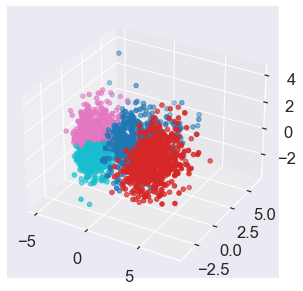

In [299]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.2,min_samples=2*X_new_df.shape[1])
model, ss,db,ch,time_taken,cluster_labels= run_model(aggmodel, X_new)
model_data['model'].append(model)
model_data['silhouette'].append(ss)
model_data['davis-b'].append(db)
model_data['calinsky-h'].append(ch)
model_data['time_taken'].append(time_taken)
clusterD_labels=cluster_labels

In [300]:
df['cluster']=clusterA_labels

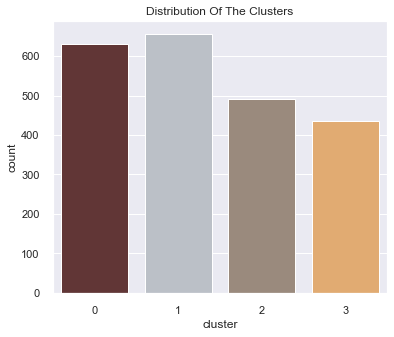

In [301]:
#cluster distriution
sns.set(font_scale=1)
plt.figure(figsize=(6,5))
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()
#cluster zero has more elements/cluster three is the smallest

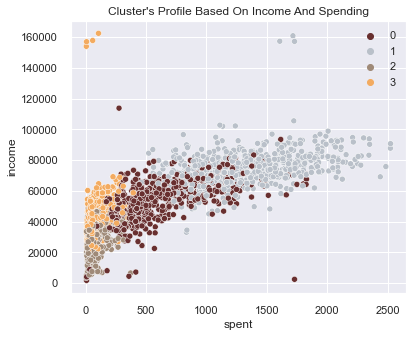

In [302]:
# study the patterns in the clusters formed and determine the nature of the clusters' patterns.
sns.set(font_scale=1)
plt.figure(figsize=(6,5))
pl = sns.scatterplot(data = df,x=df["spent"], y=df["income"],hue=df["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


#Income vs spending plot shows the clusters pattern

#group 0: low spending & low income
#group 1: high spending & high income
#group 2: average spending & average income
#group 3: average spending & high income    


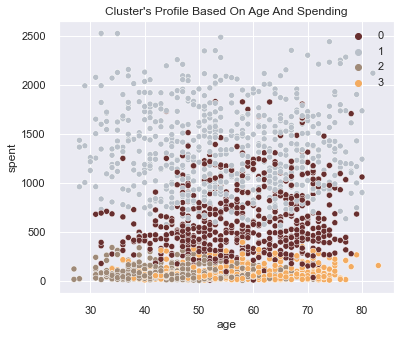

In [303]:
sns.set(font_scale=1)
plt.figure(figsize=(6,5))
pl = sns.scatterplot(data = df,x=df["age"], y=df["spent"],hue=df["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Spending")
plt.legend()
plt.show()
#there is no correlation between age and spending

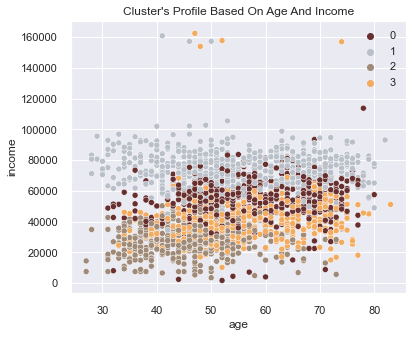

In [304]:
sns.set(font_scale=1)
plt.figure(figsize=(6,5))
pl = sns.scatterplot(data = df,x=df["age"], y=df["income"],hue=df["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Income")
plt.legend()
plt.show()
#there is no correlation between age and income

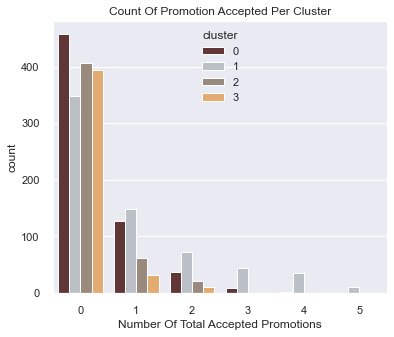

In [305]:
#Plotting count of total campaign accepted.
plt.figure(figsize=(6,5))
pl = sns.countplot(x=df["total_acc_cmp"],hue=df["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted Per Cluster")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

#There has not been an overwhelming response to the campaigns so far. Very few participants overall.Cluster 0 
#tends to respond to campaigns the most folllowed by cluster 1.
#Perhapss. better-targeted and well-planned campaigns are required to boost sale


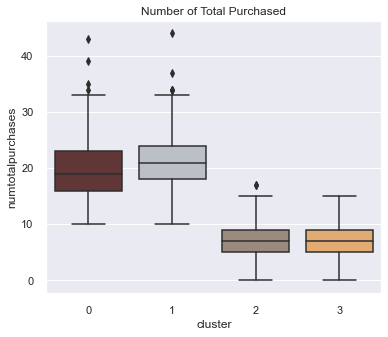

In [306]:
plt.figure(figsize=(6,5))
pl=sns.boxplot(y=df["numtotalpurchases"],x=df["cluster"], palette= pal)
pl.set_title("Number of Total Purchased")
plt.show()
#cluster 3 seems to have more purchases than the other clusters

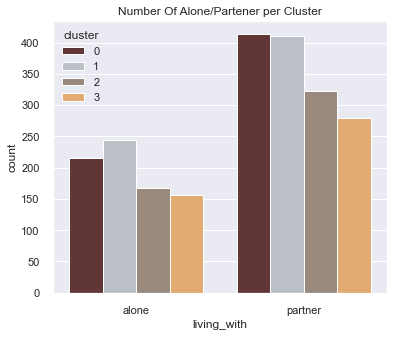

In [307]:
plt.figure(figsize=(6,5))
pl=sns.countplot(x=df['living_with'],hue=df["cluster"], palette= pal)
pl.set_title("Number Of Alone/Partener per Cluster")
plt.show()

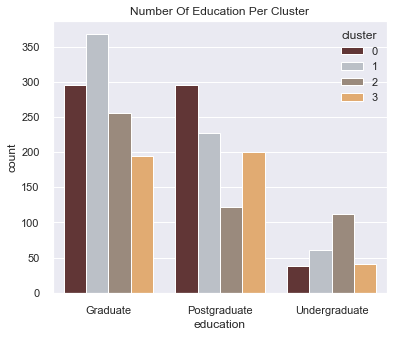

In [308]:
plt.figure(figsize=(6,5))
pl=sns.countplot(x=df['education'],hue=df["cluster"], palette= pal)
pl.set_title("Number Of Education Per Cluster")
plt.show()
#more graduate in the cluster zero

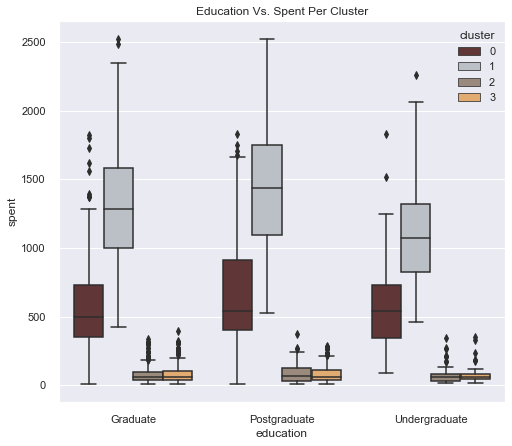

In [309]:
plt.figure(figsize=(8,7))
pl=sns.boxplot(x=df['education'],y=df['spent'],hue=df["cluster"], palette= pal)
pl.set_title("Education Vs. Spent Per Cluster")
plt.show()
#cluster zero tends to spend less no matter the education
#cluster one tends to spent more no matter the education

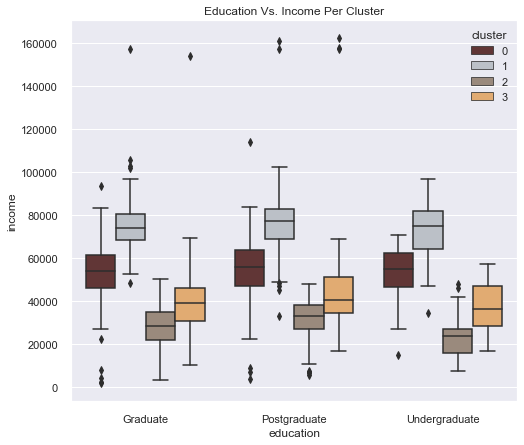

In [310]:
plt.figure(figsize=(8,7))
pl=sns.boxplot(x=df['education'],y=df['income'],hue=df["cluster"], palette= pal)
pl.set_title("Education Vs. Income Per Cluster")
plt.show()
#cluster zero tends to have less income no matter the education
#cluster one tends to have

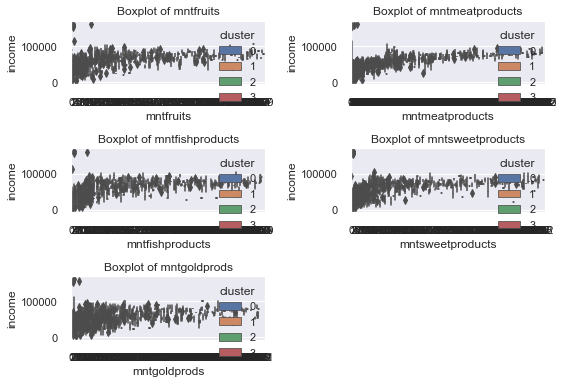

In [311]:
col_list=['mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldprods']
for i,item in enumerate(col_list):
    ax=plt.subplot(3,2,i+1)
    sns.boxplot(data=df,x=df[item],y=df['income'],hue=df['cluster'],ax=ax)
    ax.set_title(f'Boxplot of {item}')
    i=i+1
plt.tight_layout()